<a href="https://colab.research.google.com/github/RicardoScript/estructura-de-datos/blob/main/ED_sem4_microbrenchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejecutando pruebas de correctitud...
✓ Todas las pruebas de correctitud pasaron correctamente

INICIANDO MICRO-BENCHMARK

Resultados del Benchmark:
n		Lineal (s)		Binaria (s)
-------------------------------------------------------
     100	0.00000528	0.00000183
   1,000	0.00000565	0.00000197
  10,000	0.00035420	0.00000416
 100,000	0.00209554	0.00000363
1,000,000	0.07816069	0.00000825


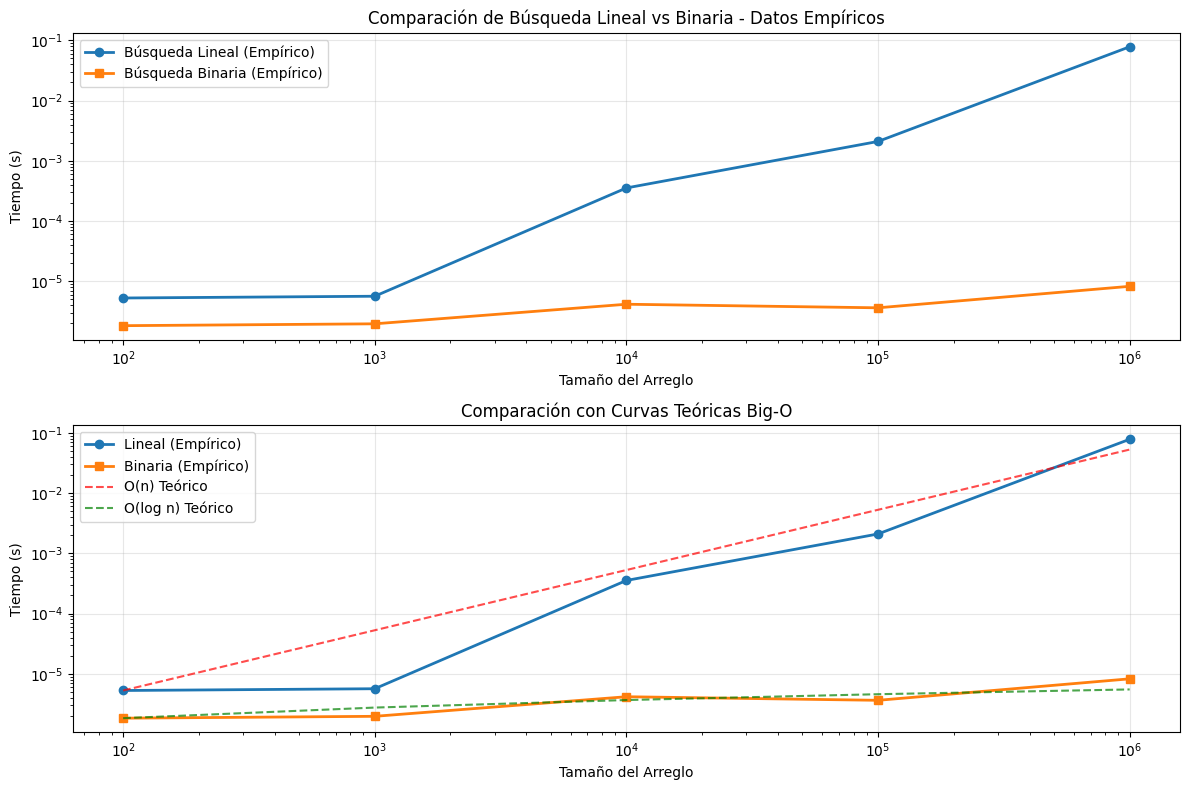


BENCHMARK COMPLETADO


In [4]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

# ------------------- Algoritmos de busqueda -------------------
def busqueda_lineal(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

def busqueda_binaria(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# ------------------- Pruebas de correctitud -------------------
def pruebas_correctitud():
    """Verifica que los algoritmos funcionen correctamente en todos los casos"""

    print("Ejecutando pruebas de correctitud...")

    # Caso 1: Elemento presente en el medio
    arr = [1, 3, 5, 7, 9]
    assert busqueda_lineal(arr, 5) == 2, "Error en caso 1 - lineal"
    assert busqueda_binaria(arr, 5) == 2, "Error en caso 1 - binaria"

    # Caso 2: Elemento presente al inicio
    assert busqueda_lineal(arr, 1) == 0, "Error en caso 2 - lineal"
    assert busqueda_binaria(arr, 1) == 0, "Error en caso 2 - binaria"

    # Caso 3: Elemento presente al final
    assert busqueda_lineal(arr, 9) == 4, "Error en caso 3 - lineal"
    assert busqueda_binaria(arr, 9) == 4, "Error en caso 3 - binaria"

    # Caso 4: Elemento ausente
    assert busqueda_lineal(arr, 4) == -1, "Error en caso 4 - lineal"
    assert busqueda_binaria(arr, 4) == -1, "Error en caso 4 - binaria"

    # Caso 5: Array vacio
    assert busqueda_lineal([], 1) == -1, "Error en caso 5 - lineal"
    assert busqueda_binaria([], 1) == -1, "Error en caso 5 - binaria"

    # Caso 6: Array con un elemento
    assert busqueda_lineal([42], 42) == 0, "Error en caso 6 - lineal"
    assert busqueda_binaria([42], 42) == 0, "Error en caso 6 - binaria"

    print("✓ Todas las pruebas de correctitud pasaron correctamente")

# ---------------------- Benchmark -----------------------------
def benchmark(algoritmo, arr, target, iteraciones=10):
    tiempos = []
    for _ in range(iteraciones):
        inicio = time.perf_counter()
        algoritmo(arr, target)
        fin = time.perf_counter()
        tiempos.append(fin - inicio)
    return sum(tiempos) / len(tiempos)

# ------------------- Ejecucion de pruebas ---------------------

# Primero ejecutar pruebas de correctitud
pruebas_correctitud()

print("\n" + "="*50)
print("INICIANDO MICRO-BENCHMARK")
print("="*50)

tamanos = [100, 1000, 10000, 100000, 1000000]
tiempos_lineal = []
tiempos_binaria = []

print("\nResultados del Benchmark:")
print("n\t\tLineal (s)\t\tBinaria (s)")
print("-" * 55)

for n in tamanos:
    # Generar dataset ordenado (requisito para busqueda binaria)
    arr = list(range(n))
    target = random.randint(0, n - 1)

    tiempo_l = benchmark(busqueda_lineal, arr, target)
    tiempo_b = benchmark(busqueda_binaria, arr, target)

    tiempos_lineal.append(tiempo_l)
    tiempos_binaria.append(tiempo_b)

    print(f"{n:8,}\t{tiempo_l:.8f}\t{tiempo_b:.8f}")

# ------------------------ Graficos -----------------------------
plt.figure(figsize=(12, 8))

# Graficar datos empiricos
plt.subplot(2, 1, 1)
plt.plot(tamanos, tiempos_lineal, 'o-', label='Busqueda Lineal (Empirico)', linewidth=2)
plt.plot(tamanos, tiempos_binaria, 's-', label='Busqueda Binaria (Empirico)', linewidth=2)
plt.xlabel('Tamanioo del Arreglo')
plt.ylabel('Tiempo (s)')
plt.title('Comparacion de Busqueda Lineal vs Binaria - Datos Empiricos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

# Grafico con curvas teoricas
plt.subplot(2, 1, 2)
n_teorico = np.array(tamanos)

# Curva teorica O(n)
c_lineal = tiempos_lineal[0] / tamanos[0]
teorico_lineal = c_lineal * n_teorico

# Curva teorica O(log n)
c_binaria = tiempos_binaria[0] / np.log2(tamanos[0])
teorico_binaria = c_binaria * np.log2(n_teorico)

plt.plot(tamanos, tiempos_lineal, 'o-', label='Lineal (Empirico)', linewidth=2)
plt.plot(tamanos, tiempos_binaria, 's-', label='Binaria (Empirico)', linewidth=2)
plt.plot(tamanos, teorico_lineal, 'r--', label='O(n) Teorico', alpha=0.7)
plt.plot(tamanos, teorico_binaria, 'g--', label='O(log n) Teorico', alpha=0.7)

plt.xlabel('Tamanioo del Arreglo')
plt.ylabel('Tiempo (s)')
plt.title('Comparacion con Curvas Teoricas Big-O')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.savefig('comparacion_completa.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*50)
print("BENCHMARK COMPLETADO")
print("="*50)